# Achievement Gap in Berkeley

In [27]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import MarkerCluster
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

## Loading street map of Berkeley

**Using a shapely file as a plane to plot our data points**

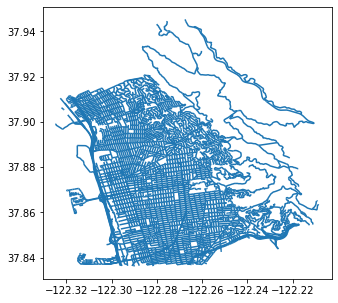

In [2]:
street_map = gpd.read_file("data/geo_export_319fb1f1-cd43-4367-a5ee-0ffcf3f79456.shp")

fig,ax = plt.subplots(figsize=(15, 5))
street_map.plot(ax = ax)


## Looking solely at test data
**Selected test data from Keilyn's data**

In [93]:
data1 = pd.read_csv("data/ky_caaspp_2018_clean.csv")
zipdata = pd.read_csv("data/2018berkschools.csv")


crs = {'init': 'epsg:4326'}

#Excluding the Magnate Schools
data = data1[data1['zipcode'] != 94709]

schools = data.loc[:, "school":"zipcode"]

scores = data.loc[:, "pct_exceed":"pct_not_met"]
scores['school'] = schools['school']
scores['zipcode'] = schools['zipcode']

data.loc[:, "pct_exceed":"pct_not_met"].head()
data.query("subgroup_id == 111")

,Unnamed: 0,county_code_x,district_code_x,school_code_x,filler,year,subgroup_id,type,total_tested,total_tested_scores,...,category,subgroup,county_code_y,district_code_y,school_code_y,type_id,county,district,school,zipcode
2724,2724,1,61143,0,NaN,2018,111,B,3105,3098,...,Economic Status,Not economically disadvantaged,1.0,61143.0,0.0,6.0,Alameda,Berkeley Unified,NaN,NaN
2725,2725,1,61143,0,NaN,2018,111,B,3083,3079,...,Economic Status,Not economically disadvantaged,1.0,61143.0,0.0,6.0,Alameda,Berkeley Unified,NaN,NaN
2726,2726,1,61143,0,NaN,2018,111,B,3083,3079,...,Economic Status,Not economically disadvantaged,1.0,61143.0,0.0,6.0,Alameda,Berkeley Unified,NaN,NaN
2727,2727,1,61143,0,NaN,2018,111,B,3105,3098,...,Economic Status,Not economically disadvantaged,1.0,61143.0,0.0,6.0,Alameda,Berkeley Unified,NaN,NaN
2728,2728,1,61143,0,NaN,2018,111,B,3105,3098,...,Economic Status,Not economically disadvantaged,1.0,61143.0,0.0,6.0,Alameda,Berkeley Unified,NaN,NaN
2729,2729,1,61143,0,NaN,2018,111,B,3083,3079,...,Economic Status,Not economically disadvantaged,1.0,61143.0,0.0,6.0,Alameda,Berkeley Unified,NaN,NaN
2730,2730,1,61143,0,NaN,2018,111,B,3083,3079,...,Economic Status,Not economically disadvantaged,1.0,61143.0,0.0,6.0,Alameda,Berkeley Unified,NaN,NaN
2731,2731,1,61143,0,NaN,2018,111,B,3105,3098,...,Economic Status,Not economically disadvantaged,1.0,61143.0,0.0,6.0,Alameda,Berkeley Unified,NaN,NaN
2732,2732,1,61143,0,NaN,2018,111,B,3105,3098,...,Economic Status,Not economically disadvantaged,1.0,61143.0,0.0,6.0,Alameda,Berkeley Unified,NaN,NaN
2733,2733,1,61143,0,NaN,2018,111,B,3083,3079,...,Economic Status,Not economically disadvantaged,1.0,61143.0,0.0,6.0,Alameda,Berkeley Unified,NaN,NaN


**Removed NaN values from test data.**

Also added the corresponding coordinates (longitude & latitude) to the dataframe based on the coordinates off of Google Maps.
Assuming that the NaN values are homeschool values, I removed them to ensure the mapping of the coordinates would work. Thus, this dataframe excludes homeschool test data.

In [4]:
map_data = scores.dropna().merge(zipdata.loc[:, "zipcode":"lat"], how='inner', left_on='zipcode', right_on='zipcode')
map_data.head()

,pct_exceed,pct_met,pct_met_above,pct_nearly_met,pct_not_met,school,zipcode,long,lat
0,28.25,25.79,54.04,17.37,28.60,Berkeley High,94704.0,37.868018,-122.271406
1,28.25,25.79,54.04,17.37,28.60,Berkeley High,94704.0,37.866910,-122.273128
2,40.00,27.50,67.50,16.67,15.83,Berkeley High,94704.0,37.868018,-122.271406
3,40.00,27.50,67.50,16.67,15.83,Berkeley High,94704.0,37.866910,-122.273128
4,40.00,27.50,67.50,16.67,15.83,Berkeley High,94704.0,37.868018,-122.271406


## Conversion from pandas to geopandas dataframe

In [5]:
geo_shapes = [Point(xy) for xy in zip(map_data['lat'], map_data['long'])]
geo_data = gpd.GeoDataFrame(map_data, crs = crs, geometry = geo_shapes)
geo_data.head()

,pct_exceed,pct_met,pct_met_above,pct_nearly_met,pct_not_met,school,zipcode,long,lat,geometry
0,28.25,25.79,54.04,17.37,28.60,Berkeley High,94704.0,37.868018,-122.271406,POINT (-122.271406 37.868018)
1,28.25,25.79,54.04,17.37,28.60,Berkeley High,94704.0,37.866910,-122.273128,POINT (-122.273128 37.86691)
2,40.00,27.50,67.50,16.67,15.83,Berkeley High,94704.0,37.868018,-122.271406,POINT (-122.271406 37.868018)
3,40.00,27.50,67.50,16.67,15.83,Berkeley High,94704.0,37.866910,-122.273128,POINT (-122.273128 37.86691)
4,40.00,27.50,67.50,16.67,15.83,Berkeley High,94704.0,37.868018,-122.271406,POINT (-122.271406 37.868018)


In [6]:
school_locations = map_data.groupby('school').first()[['geometry', 'long', 'lat']]

school_locations.index

school_locations.loc["Berkeley High"]
school_locations

,geometry,long,lat
school,,,
Berkeley High,POINT (-122.271406 37.868018),37.868018,-122.271406
Cragmont Elementary,POINT (-122.267709 37.894324),37.894324,-122.267709
Emerson Elementary,POINT (-122.258473 37.860095),37.860095,-122.258473
Jefferson Elementary,POINT (-122.285046 37.879098),37.879098,-122.285046
John Muir Elementary,POINT (-122.258473 37.860095),37.860095,-122.258473
Longfellow Arts And Technology Middle,POINT (-122.277019 37.881804),37.881804,-122.277019
Malcolm X Elementary,POINT (-122.277019 37.881804),37.881804,-122.277019
Martin Luther King Middle,POINT (-122.277019 37.881804),37.881804,-122.277019
Oxford Elementary,POINT (-122.26832 37.887722),37.887722,-122.268320


## Locations of Berkeley schools

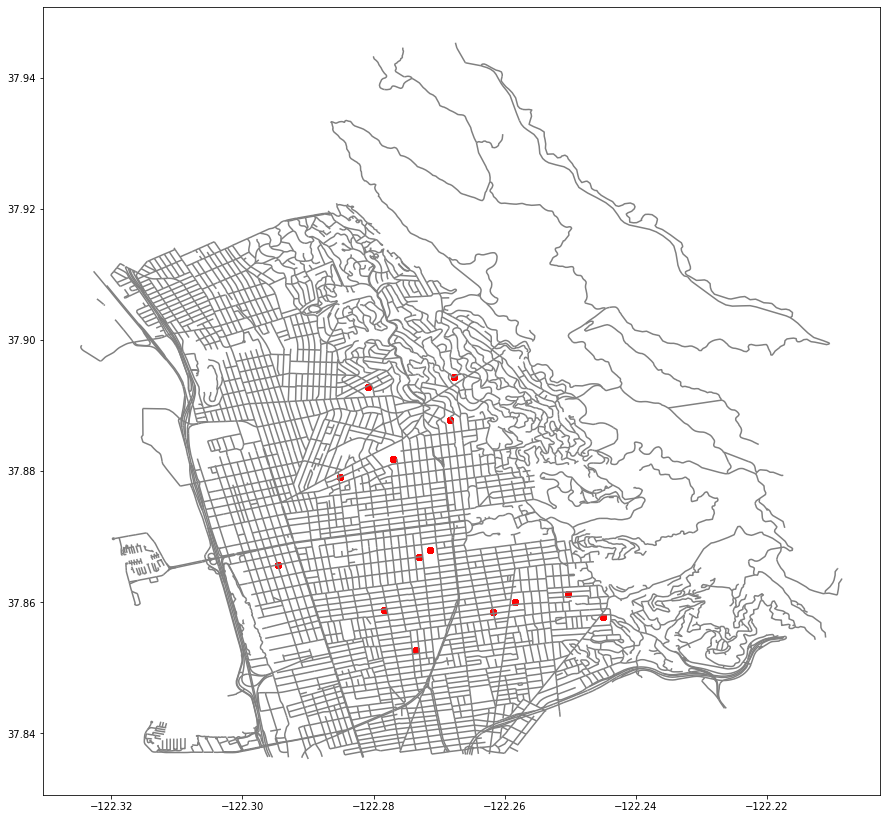

In [7]:
fig,ax = plt.subplots(figsize=(15, 15))
street_map.plot(ax=ax, color='grey')
#exceeded = geo_data[geo_data['pct_met'] >= 50]

geo_data['geometry'].plot(ax=ax, color='red')
#exceeded.plot(ax=ax, color='green')
plt.show()

# Folium Library Mapping

## Not Socio-economically Disadvantaged (SED)
**I am now solely looking at test data from the subgroup 111, Non-SED students.**

In [84]:
sed_scores = data.query("subgroup_id == 111").loc[:, "pct_exceed":"pct_not_met"]
sed_scores['school'] = schools['school']
sed_scores['zipcode'] = schools['zipcode']
sed_scores = sed_scores.dropna()
sed_scores.head()

,pct_exceed,pct_met,pct_met_above,pct_nearly_met,pct_not_met,school,zipcode
2752,50.24,26.78,77.01,12.32,10.66,Berkeley High,94704.0
2753,36.84,28.57,65.41,15.29,19.30,Berkeley High,94704.0
2754,36.84,28.57,65.41,15.29,19.30,Berkeley High,94704.0
2755,50.24,26.78,77.01,12.32,10.66,Berkeley High,94704.0
2772,40.27,40.27,80.53,15.04,4.42,Martin Luther King Middle,94703.0


In [85]:
sed_scores_zip = sed_scores.merge(zipdata.loc[:, "zipcode":"lat"], how='right', left_on='zipcode', right_on='zipcode')
sed_scores_zip = sed_scores_zip
sed_scores_zip.head()

,pct_exceed,pct_met,pct_met_above,pct_nearly_met,pct_not_met,school,zipcode,long,lat
0,50.24,26.78,77.01,12.32,10.66,Berkeley High,94704.0,37.868018,-122.271406
1,36.84,28.57,65.41,15.29,19.30,Berkeley High,94704.0,37.868018,-122.271406
2,36.84,28.57,65.41,15.29,19.30,Berkeley High,94704.0,37.868018,-122.271406
3,50.24,26.78,77.01,12.32,10.66,Berkeley High,94704.0,37.868018,-122.271406
4,48.84,27.91,76.74,13.95,9.30,Washington Elementary,94704.0,37.868018,-122.271406


In [80]:
b_high_location = [school_locations['long'][0], sed_scores_zip['lat'][0]]
b_high = folium.Map(location=b_high_location)
folium.Marker(b_high_location, popup='<i>Berkeley High School</i>', clustered_marker=True).add_to(b_high)
b_high

In [81]:
berk_map = folium.Map(location=[school_locations['long'].mean(),school_locations['lat'].mean()], zoom_start=12)

mc = MarkerCluster()

for r in np.arange(0, 240):
    mc.add_child(folium.Marker(location=[sed_scores_zip['long'][r], sed_scores_zip['lat'][r]]))
        
berk_map.add_child(mc)

In [82]:
#name the schools, use a heatmap or contour to show data density
#express the achievement gap 
#size of bubble of data can to signal amount of data at the school


In [83]:
sed_scores_zip.query("school == 'Jefferson Elementary'")

,pct_exceed,pct_met,pct_met_above,pct_nearly_met,pct_not_met,school,zipcode,long,lat
240,69.49,23.73,93.22,1.69,5.08,Jefferson Elementary,94702.0,NaN,NaN
241,57.63,25.42,83.05,8.47,8.47,Jefferson Elementary,94702.0,NaN,NaN
242,61.76,32.35,94.12,5.88,0.00,Jefferson Elementary,94702.0,NaN,NaN
243,50.00,32.35,82.35,17.65,0.00,Jefferson Elementary,94702.0,NaN,NaN
244,66.00,18.00,84.00,14.00,2.00,Jefferson Elementary,94702.0,NaN,NaN
245,50.00,42.00,92.00,6.00,2.00,Jefferson Elementary,94702.0,NaN,NaN
246,55.94,32.87,88.81,6.99,4.20,Jefferson Elementary,94702.0,NaN,NaN
247,63.64,23.78,87.41,9.79,2.80,Jefferson Elementary,94702.0,NaN,NaN
248,69.49,23.73,93.22,1.69,5.08,Jefferson Elementary,94702.0,37.879098,-122.285046
249,57.63,25.42,83.05,8.47,8.47,Jefferson Elementary,94702.0,37.879098,-122.285046
